# **MÓDULO 19**
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Os dados são criados a seguir:

In [2]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


# 1) De acordo com as informações analisadas o nosso teste é unilateral á direita, esquerda ou bicaudal? Justifique.




In [ ]:
# Resposta:
# O teste é unilateral à direita,
# pois a hipótese alternativa afirma que a média da Estratégia B é maior que a da Estratégia A. rpz agr fiquei meio confuso porem acredito q esteja certo 


# 2) Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dados?

In [4]:
media_A = np.mean(amostra_estrategia_A)
media_B = np.mean(amostra_estrategia_B)

variancia_A = np.var(amostra_estrategia_A, ddof=1)
variancia_B = np.var(amostra_estrategia_B, ddof=1)

print(f"Média Estratégia A: {media_A:.2f}")
print(f"Variância Estratégia A: {variancia_A:.2f}")
print(f"Média Estratégia B: {media_B:.2f}")
print(f"Variância Estratégia B: {variancia_B:.2f}")

# A média da Estratégia B deve ser maior, indicando melhor desempenho médio.

# Se a variância de B for maior, há mais dispersão das notas — mais desigualdade entre os alunos.

Média Estratégia A: 71.41
Variância Estratégia A: 129.27
Média Estratégia B: 74.75
Variância Estratégia B: 110.47


# 3) Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

In [5]:
# Tamanho das amostras
n_A = len(amostra_estrategia_A)
n_B = len(amostra_estrategia_B)

# Estatística Z
z = (media_B - media_A) / np.sqrt((variancia_A / n_A) + (variancia_B / n_B))

# p-value (teste unilateral à direita)
p_valor = 1 - stats.norm.cdf(z)

print(f"Estatística Z: {z:.4f}")
print(f"P-valor: {p_valor:.4f}")

# Nível de significância
alpha = 0.05

if p_valor < alpha:
    print("→ Rejeitamos H0: A média da Estratégia B é significativamente maior.")
else:
    print("→ Não rejeitamos H0: Não há diferença significativa.")

Estatística Z: 1.5267
P-valor: 0.0634
→ Não rejeitamos H0: Não há diferença significativa.


# 4) Para finalizar monte o gráfico da distribuição da estatística do nosso teste Z e explique o que pode ser observado através dele.

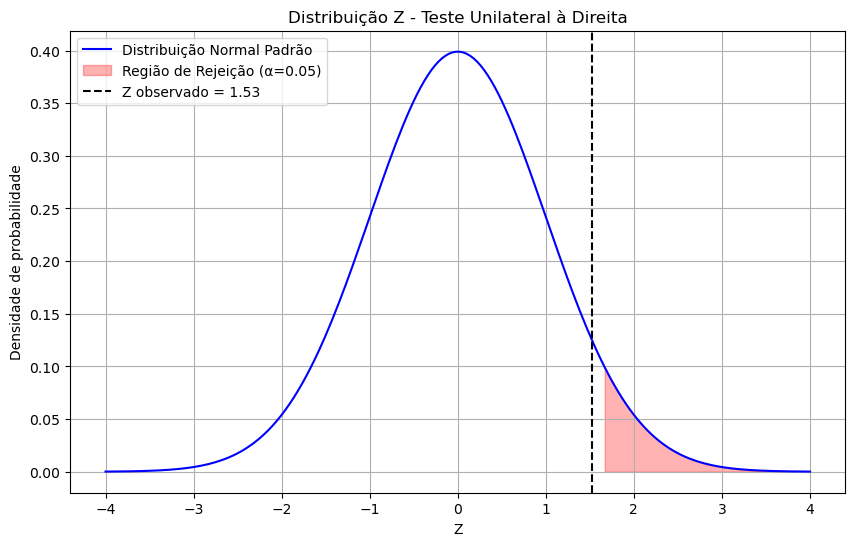

In [6]:
# Geração de valores Z para o gráfico
z_values = np.linspace(-4, 4, 200)
pdf = stats.norm.pdf(z_values, 0, 1)

plt.figure(figsize=(10,6))
plt.plot(z_values, pdf, label='Distribuição Normal Padrão', color='blue')

# Área de rejeição (à direita)
z_critico = stats.norm.ppf(1 - alpha)
plt.fill_between(z_values, 0, pdf, where=(z_values >= z_critico), color='red', alpha=0.3, label='Região de Rejeição (α=0.05)')

# Linha do valor observado
plt.axvline(z, color='black', linestyle='--', label=f'Z observado = {z:.2f}')

plt.title("Distribuição Z - Teste Unilateral à Direita")
plt.xlabel("Z")
plt.ylabel("Densidade de probabilidade")
plt.legend()
plt.grid(True)
plt.show()

# A curva azul representa a distribuição normal padrão.
# A área vermelha mostra a região crítica, onde rejeitamos H0
# Se a linha pontilhada (Z observado) cair dentro dessa área, há evidência suficiente para concluir que a Estratégia B é mais eficaz.